### Review of Pandas Library using a Kaggle Dataset

[CCFD Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)



In [1]:
# Import Pandas Library
import pandas as pd

#### 1. Data Acquisition (Load)

This is the "Ingestion" phase. In Pandas, this usually involves read_csv(), read_sql(), or read_json(). At this stage, you aren't changing data; you are simply ensuring it is accessible in your environment.

In [2]:
# Read the dataset

df = pd.read_csv("data/creditcard_2023.csv")
# df = pd.read_sql("SELECT * FROM creditcard", con=conn)
# pd = read_json("data/creditcard_2023.json")

#### 2. Data Cleaning(Wrangle/Tidy) [Curation]

This is where most of your Pandas review will take place. It involves:
Handling Missing Values: Deciding whether to drop or impute.
Data Type Alignment: Ensuring dates are datetime objects and categories are category types.
Renaming & Reindexing: Making the dataset intuitive to work with.
Normalization: Handling outliers or inconsistent string formatting.

In [3]:
"""2.1 First, we seek to understand the dataset and its structure."""

# Display the first few rows of the dataset
print(df.head())

# Display summary information about the columns and their respective data types
print(df.info())

# Display summary statistics for the numerical columns
print(df.describe())

# Check classes for each column
for col in df.columns:
    if df[col].dtype == "int" or df[col].dtype == "object":
        print(f"column {col} has classes: {df[col].unique()}")


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [4]:
"""2.2 Handling Missing Values: Deciding whether to drop or impute."""
# Check for missing values in the dataset
print(df.isnull().sum())

#, and correct if/where necessary
"""If there is any null value, it is necessary to understand the potential impact
Some options to solve the issue include choosing to either drop the rows with null values 
or fill them with a specific value (e.g., mean, median, mode)."""

# For example, to fill null values with the mean of the column:
df.fillna(df.mean(), inplace=True)

# To drop rows with null values:
df.dropna(inplace=True)


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
"""2.3 Data Type Alignment: Ensuring dates are datetime objects and categories are category types."""
    """# Convert date columns to datetime objects
    df["date_column"] = pd.to_datetime(df["date_column"])

    # Convert categorical columns to category types
    df["category_column"] = df["category_column"].astype("category")"""

IndentationError: unexpected indent (2748464345.py, line 2)

In [7]:
"""2.4 Renaming & Reindexing: Making the dataset intuitive to work with."""
# Rename columns for better clarity
df.rename(columns={"id": "transaction_id", "Amount": "amount"}, inplace=True)

# Set a new index if necessary (e.g., transaction_id)
df.set_index("transaction_id", inplace=True)

In [10]:
"""2.5 Check for duplicates and remove them if necessary."""
print(df[df.duplicated(keep=False)])
duplicate = df[df.duplicated()]

# Remove duplicates
print("Shape before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)



                      V1        V2        V3        V4        V5        V6  \
transaction_id                                                               
323127         -1.704517  2.599199 -1.205391  0.503527 -0.949674  3.226002   
510531         -1.704517  2.599199 -1.205391  0.503527 -0.949674  3.226002   

                      V7        V8        V9       V10  ...      V21  \
transaction_id                                          ...            
323127         -2.323095 -6.027712  0.273389 -0.698893  ...  8.08708   
510531         -2.323095 -6.027712  0.273389 -0.698893  ...  8.08708   

                     V22       V23       V24       V25       V26       V27  \
transaction_id                                                               
323127         -6.450353  6.343132 -1.075048  0.349881 -0.240261  1.534445   
510531         -6.450353  6.343132 -1.075048  0.349881 -0.240261  1.534445   

                     V28    amount  Class  
transaction_id                           

In [11]:
# Show statistics before normalization: 
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,Class
count,568629.000000,568629.000000,568629.000000,5.686290e+05,568629.000000,568629.000000,568629.000000,568629.000000,5.686290e+05,568629.000000,...,568629.000000,568629.000000,568629.000000,568629.000000,5.686290e+05,5.686290e+05,568629.000000,568629.000000,568629.000000,568629.000000
mean,0.000003,-0.000005,0.000002,-8.855104e-07,0.000002,-0.000006,0.000004,0.000011,-4.807863e-07,0.000001,...,-0.000014,0.000011,-0.000011,0.000002,-6.153061e-07,4.225269e-07,-0.000003,-0.000004,12041.939156,0.499999
std,0.999999,0.999996,1.000000,1.000002e+00,1.000001,0.999993,0.999997,0.999970,1.000002e+00,1.000001,...,0.999944,0.999965,0.999966,1.000001,1.000002e+00,1.000002e+00,1.000000,0.999998,6919.636504,0.500000
min,-3.495584,-49.966572,-3.183760,-4.951222e+00,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919e+00,-3.163276,...,-19.382523,-7.734798,-30.295450,-4.067968,-1.361263e+01,-8.226969e+00,-10.498633,-39.035243,50.010000,0.000000
25%,-0.565285,-0.486680,-0.649298,-6.560208e-01,-0.293495,-0.445872,-0.283533,-0.192257,-5.687501e-01,-0.590101,...,-0.166441,-0.490486,-0.237629,-0.651580,-5.541491e-01,-6.318949e-01,-0.304961,-0.231878,6054.860000,0.000000
50%,-0.093636,-0.135894,0.000354,-7.376398e-02,0.081089,0.078716,0.233367,-0.114523,9.252585e-02,0.262617,...,-0.037431,-0.027327,-0.059689,0.015903,-8.193948e-03,-1.189070e-02,-0.172911,-0.013930,12030.130000,0.000000
75%,0.832658,0.343553,0.628539,7.070060e-01,0.439738,0.497788,0.525955,0.047299,5.592661e-01,0.592462,...,0.147976,0.463887,0.155715,0.700740,5.500149e-01,6.728885e-01,0.334021,0.409589,18036.330000,1.000000
max,2.229046,4.361865,14.125834,3.201536e+00,42.716891,26.168402,217.873038,5.958040,2.027006e+01,31.722709,...,8.087080,12.632511,31.707627,12.965639,1.462151e+01,5.623285e+00,113.231093,77.255937,24039.930000,1.000000


In [13]:
"""2.6 Normalization & Scaling: Preparing numerical data for analysis."""

# Normalize the 'amount' column using Min-Max scaling
df["amount_normalized"] = (df["amount"] - df["amount"].min()) / (df["amount"].max() - df["amount"].min())

# Standardize the 'amount' column using Z-score normalization
df["amount_standardized"] = (df["amount"] - df["amount"].mean()) / df["amount"].std()

# Move the Class column to the end of the DataFrame
class_column = df.pop("Class")
df["Class"] = class_column

#### 3. Exploratory Data Analysis
This is the "Discovery" phase. You are looking for patterns, distributions, and correlations.

- Univariate Analysis: Looking at one variable (histograms, .describe()).
- Bivariate/Multivariate: Looking at relationships (correlation matrices, scatter plots).
- Pivot Tables: Using df.groupby() to see how metrics change across different segments.

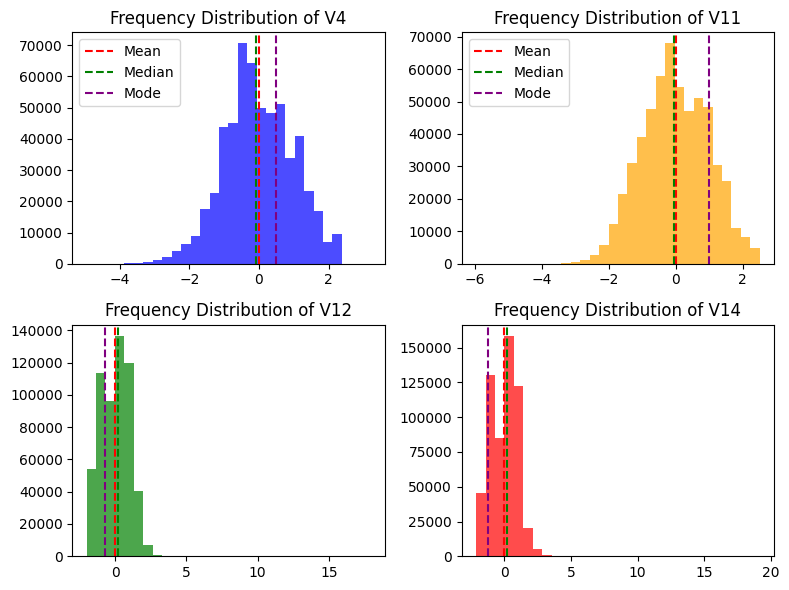

In [22]:
""" 3.1 Univariate Data Analysis: Exploring the distribution of individual features."""
import matplotlib.pyplot as plt
# Plot the frequency distribution of data from columns V4, V11, V12 and V14 (Selected given their importance in the correlation matrix)
# with a marker for the mean value of each column and a marker for the median value of each column 
# and a marker for the mode value of each column, all in the same plot for each column. 
# Use different colors for each marker and include a legend to differentiate between them.
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.hist(df["V4"], bins=30, color='blue', alpha=0.7)
plt.axvline(df["V4"].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df["V4"].median(), color='green', linestyle='--', label='Median')
plt.axvline(df["V4"].mode()[0], color='purple', linestyle='--', label='Mode')
plt.title("Frequency Distribution of V4")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df["V11"], bins=30, color='orange', alpha=0.7)
plt.axvline(df["V11"].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df["V11"].median(), color='green', linestyle='--', label='Median')
plt.axvline(df["V11"].mode()[0], color='purple', linestyle='--', label='Mode')
plt.title("Frequency Distribution of V11")
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df["V12"], bins=30, color='green', alpha=0.7)
plt.axvline(df["V12"].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df["V12"].median(), color='green', linestyle='--', label='Median')
plt.axvline(df["V12"].mode()[0], color='purple', linestyle='--', label='Mode')
plt.title("Frequency Distribution of V12")

plt.subplot(2, 2, 4)
plt.hist(df["V14"], bins=30, color='red', alpha=0.7)
plt.axvline(df["V14"].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df["V14"].median(), color='green', linestyle='--', label='Median')
plt.axvline(df["V14"].mode()[0], color='purple', linestyle='--', label='Mode')
plt.title("Frequency Distribution of V14")

plt.tight_layout()
plt.show()


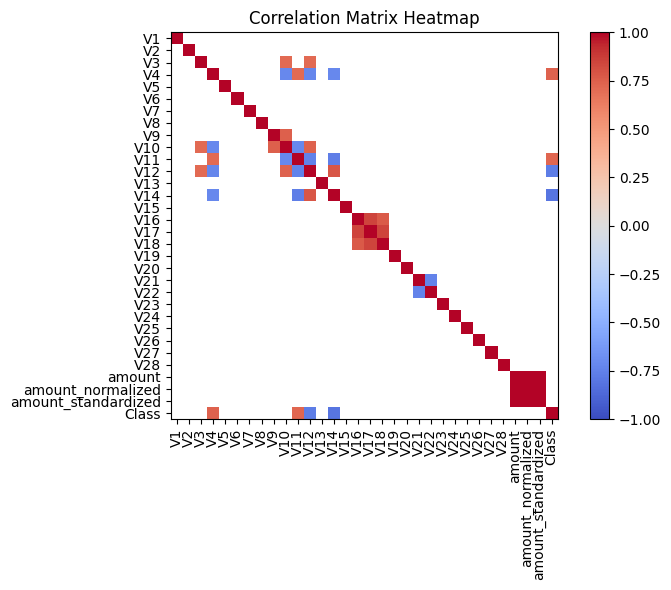

In [17]:
"""3.2 Bivariate|Multivariate Analysis: Exploring relationships between variables."""
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the 31 columns
correlation_matrix = df.corr()

# Filter out corrlation values that are less than 0.5 or greater than -0.5
x = 0.7
correlation_matrix = correlation_matrix[(correlation_matrix >= x) | (correlation_matrix <= -1*x)]

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()


In [18]:
df[["V4","V11","V12","V14"]].info()

<class 'pandas.DataFrame'>
Index: 568629 entries, 0 to 568629
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V4      568629 non-null  float64
 1   V11     568629 non-null  float64
 2   V12     568629 non-null  float64
 3   V14     568629 non-null  float64
dtypes: float64(4)
memory usage: 21.7 MB


In [20]:
"""3.3 Pivot Tables: Using df.groupby() to see how metrics change across different segments. """

# Group by the 'Class' column and calculate the mean of the 'amount' column for each class
pivot_table = df.groupby("Class")["amount"].mean()
print(pivot_table)


Class
0    12026.313506
1    12057.564862
Name: amount, dtype: float64


#### 4. Modeling and Analysis
Now that you understand the data, you perform the actual "Analysis."

- Feature Engineering: Creating new columns (e.g., is_fraud) based on existing logic.
- Statistical Testing: Validating if the patterns you saw in EDA are statistically significant.
- Machine Learning: If the goal is predictive, this is where you split into Train/Test sets.

#### 5. Visualization & Communication
The final step is translating the technical findings into business insights. This involves:

- Refining plots (Matplotlib/Seaborn/Plotly) to be "presentation-ready."
- Summarizing the "So What?" for stakeholders